In [28]:
from biomart import BiomartServer
import pandas as pd
from io import StringIO

In [29]:
server = BiomartServer( "http://www.ensembl.org/biomart" )

In [30]:
# List of mouse gene names
gene_names = ['Ins1', 'Ins2', 'Gck', 'Kcnj11', 'Abcc8', 'Hnf1a', 'Hnf4a', 'Pdx1', 'Neurod1', 
              'Irs1', 'Irs2', 'Slc2a2', 'Tcf7l2', 'Slc30a8', 'Glp1r', 'Gipr', 'Dpp4', 'Ffar1', 
              'Ffar2', 'Ffar3', 'Gpr119', 'Cckbr', 'Casr', 'Trpm5', 'Gprc6a']

In [31]:
dataset = server.datasets['mmusculus_gene_ensembl']

In [32]:
dataset.show_filters()
# 'external_gene_name': 'Gene Name(s) [e.g. mt-Tf]' (type: id_list, values: []),

{'affy_mg_u74a': 'AFFY MG U74A probe ID(s) [e.g. 103517_at]' (type: id_list, values: []),
 'affy_mg_u74av2': 'AFFY MG U74Av2 probe ID(s) [e.g. 103517_at]' (type: id_list, values: []),
 'affy_mg_u74b': 'AFFY MG U74B probe ID(s) [e.g. 112748_at]' (type: id_list, values: []),
 'affy_mg_u74bv2': 'AFFY MG U74Bv2 probe ID(s) [e.g. 112748_at]' (type: id_list, values: []),
 'affy_mg_u74c': 'AFFY MG U74C probe ID(s) [e.g. 130548_at]' (type: id_list, values: []),
 'affy_mg_u74cv2': 'AFFY MG U74Cv2 probe ID(s) [e.g. 130548_at]' (type: id_list, values: []),
 'affy_moe430a': 'AFFY MOE430A probe ID(s) [e.g. 1426088_at]' (type: id_list, values: []),
 'affy_moe430b': 'AFFY MOE430B probe ID(s) [e.g. 1445849_at]' (type: id_list, values: []),
 'affy_moex_1_0_st_v1': 'AFFY MoEx 1 0 st v1 probe ID(s) [e.g. 4835589]' (type: id_list, values: []),
 'affy_mogene_1_0_st_v1': 'AFFY MoGene 1 0 st v1 probe ID(s) [e.g. 10598023]' (type: id_list, values: []),
 'affy_mogene_2_1_st_v1': 'AFFY MoGene 2 1 st v1 probe ID

In [33]:
dataset.show_attributes()
# ensembl_gene_id

{'3_utr_end': '3' UTR end' (default: False),
 '3_utr_start': '3' UTR start' (default: False),
 '3utr': '3' UTR' (default: False),
 '5_utr_end': '5' UTR end' (default: False),
 '5_utr_start': '5' UTR start' (default: False),
 '5utr': '5' UTR' (default: False),
 'abrachyrhynchus_homolog_associated_gene_name': 'Pink-footed goose gene name' (default: False),
 'abrachyrhynchus_homolog_canonical_transcript_protein': 'Query protein or transcript ID' (default: False),
 'abrachyrhynchus_homolog_chrom_end': 'Pink-footed goose chromosome/scaffold end (bp)' (default: False),
 'abrachyrhynchus_homolog_chrom_start': 'Pink-footed goose chromosome/scaffold start (bp)' (default: False),
 'abrachyrhynchus_homolog_chromosome': 'Pink-footed goose chromosome/scaffold name' (default: False),
 'abrachyrhynchus_homolog_ensembl_gene': 'Pink-footed goose gene stable ID' (default: False),
 'abrachyrhynchus_homolog_ensembl_peptide': 'Pink-footed goose protein or transcript stable ID' (default: False),
 'abrachyrh

In [34]:
response = dataset.search({
'filters': {
    'external_gene_name': gene_names
},
'attributes': [
    'external_gene_name', 'ensembl_gene_id', 'description'
]
}, header=1)

In [35]:
data = StringIO(response.content.decode('utf-8'))

In [36]:
df = pd.read_csv(data, sep='\t', header=0)

In [37]:
genes_used = pd.read_table("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/make_big_dataset/genes_shared_across_datasets.txt")

In [38]:
genes_used = genes_used.genes_shared_across_datasets.to_list()

In [39]:
df["is_gene_in_experiment"] = df['Gene stable ID'].isin(genes_used)

In [40]:
df = df[df.is_gene_in_experiment]

### Now we find GT gene expression for these genes

In order to compare I have to find the ground truth gene expression of the cosen genes. There are quite a lot of genes, I need to somheow reduce the number. Maybe I find which have the biggest change in Wasserstain distance?

In [4]:
import scanpy as sc
import anndata as ad
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt

In [5]:
dbdb = sc.read_h5ad("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/ground_truth/full_datasets/dbdb_ground_truth_cleanCT.h5ad")

In [6]:
mSTZ = sc.read_h5ad("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/ground_truth/full_datasets/mSTZ_ground_truth_cleanCT.h5ad")

In [98]:
dbdb.obs["clusters"] = [cell_type + " " + disease for cell_type, disease in zip(dbdb.obs.cell_type.tolist(), dbdb.obs.disease.tolist())]

In [122]:
dbdb_plot = dbdb[dbdb.obs.cell_type == "type B pancreatic cell"]

In [131]:
df

,Gene name,Gene stable ID,Gene description,is_gene_in_experiment
2,Gipr,ENSMUSG00000030406,gastric inhibitory polypeptide receptor [Sourc...,True
3,Pdx1,ENSMUSG00000029644,pancreatic and duodenal homeobox 1 [Source:MGI...,True
4,Slc30a8,ENSMUSG00000022315,"solute carrier family 30 (zinc transporter), m...",True
6,Casr,ENSMUSG00000051980,calcium-sensing receptor [Source:MGI Symbol;Ac...,True
7,Irs2,ENSMUSG00000038894,insulin receptor substrate 2 [Source:MGI Symbo...,True
8,Tcf7l2,ENSMUSG00000024985,"transcription factor 7 like 2, T cell specific...",True
9,Slc2a2,ENSMUSG00000027690,solute carrier family 2 (facilitated glucose t...,True
10,Abcc8,ENSMUSG00000040136,"ATP-binding cassette, sub-family C (CFTR/MRP),...",True
11,Ffar2,ENSMUSG00000051314,free fatty acid receptor 2 [Source:MGI Symbol;...,True
13,Ffar1,ENSMUSG00000044453,free fatty acid receptor 1 [Source:MGI Symbol;...,True


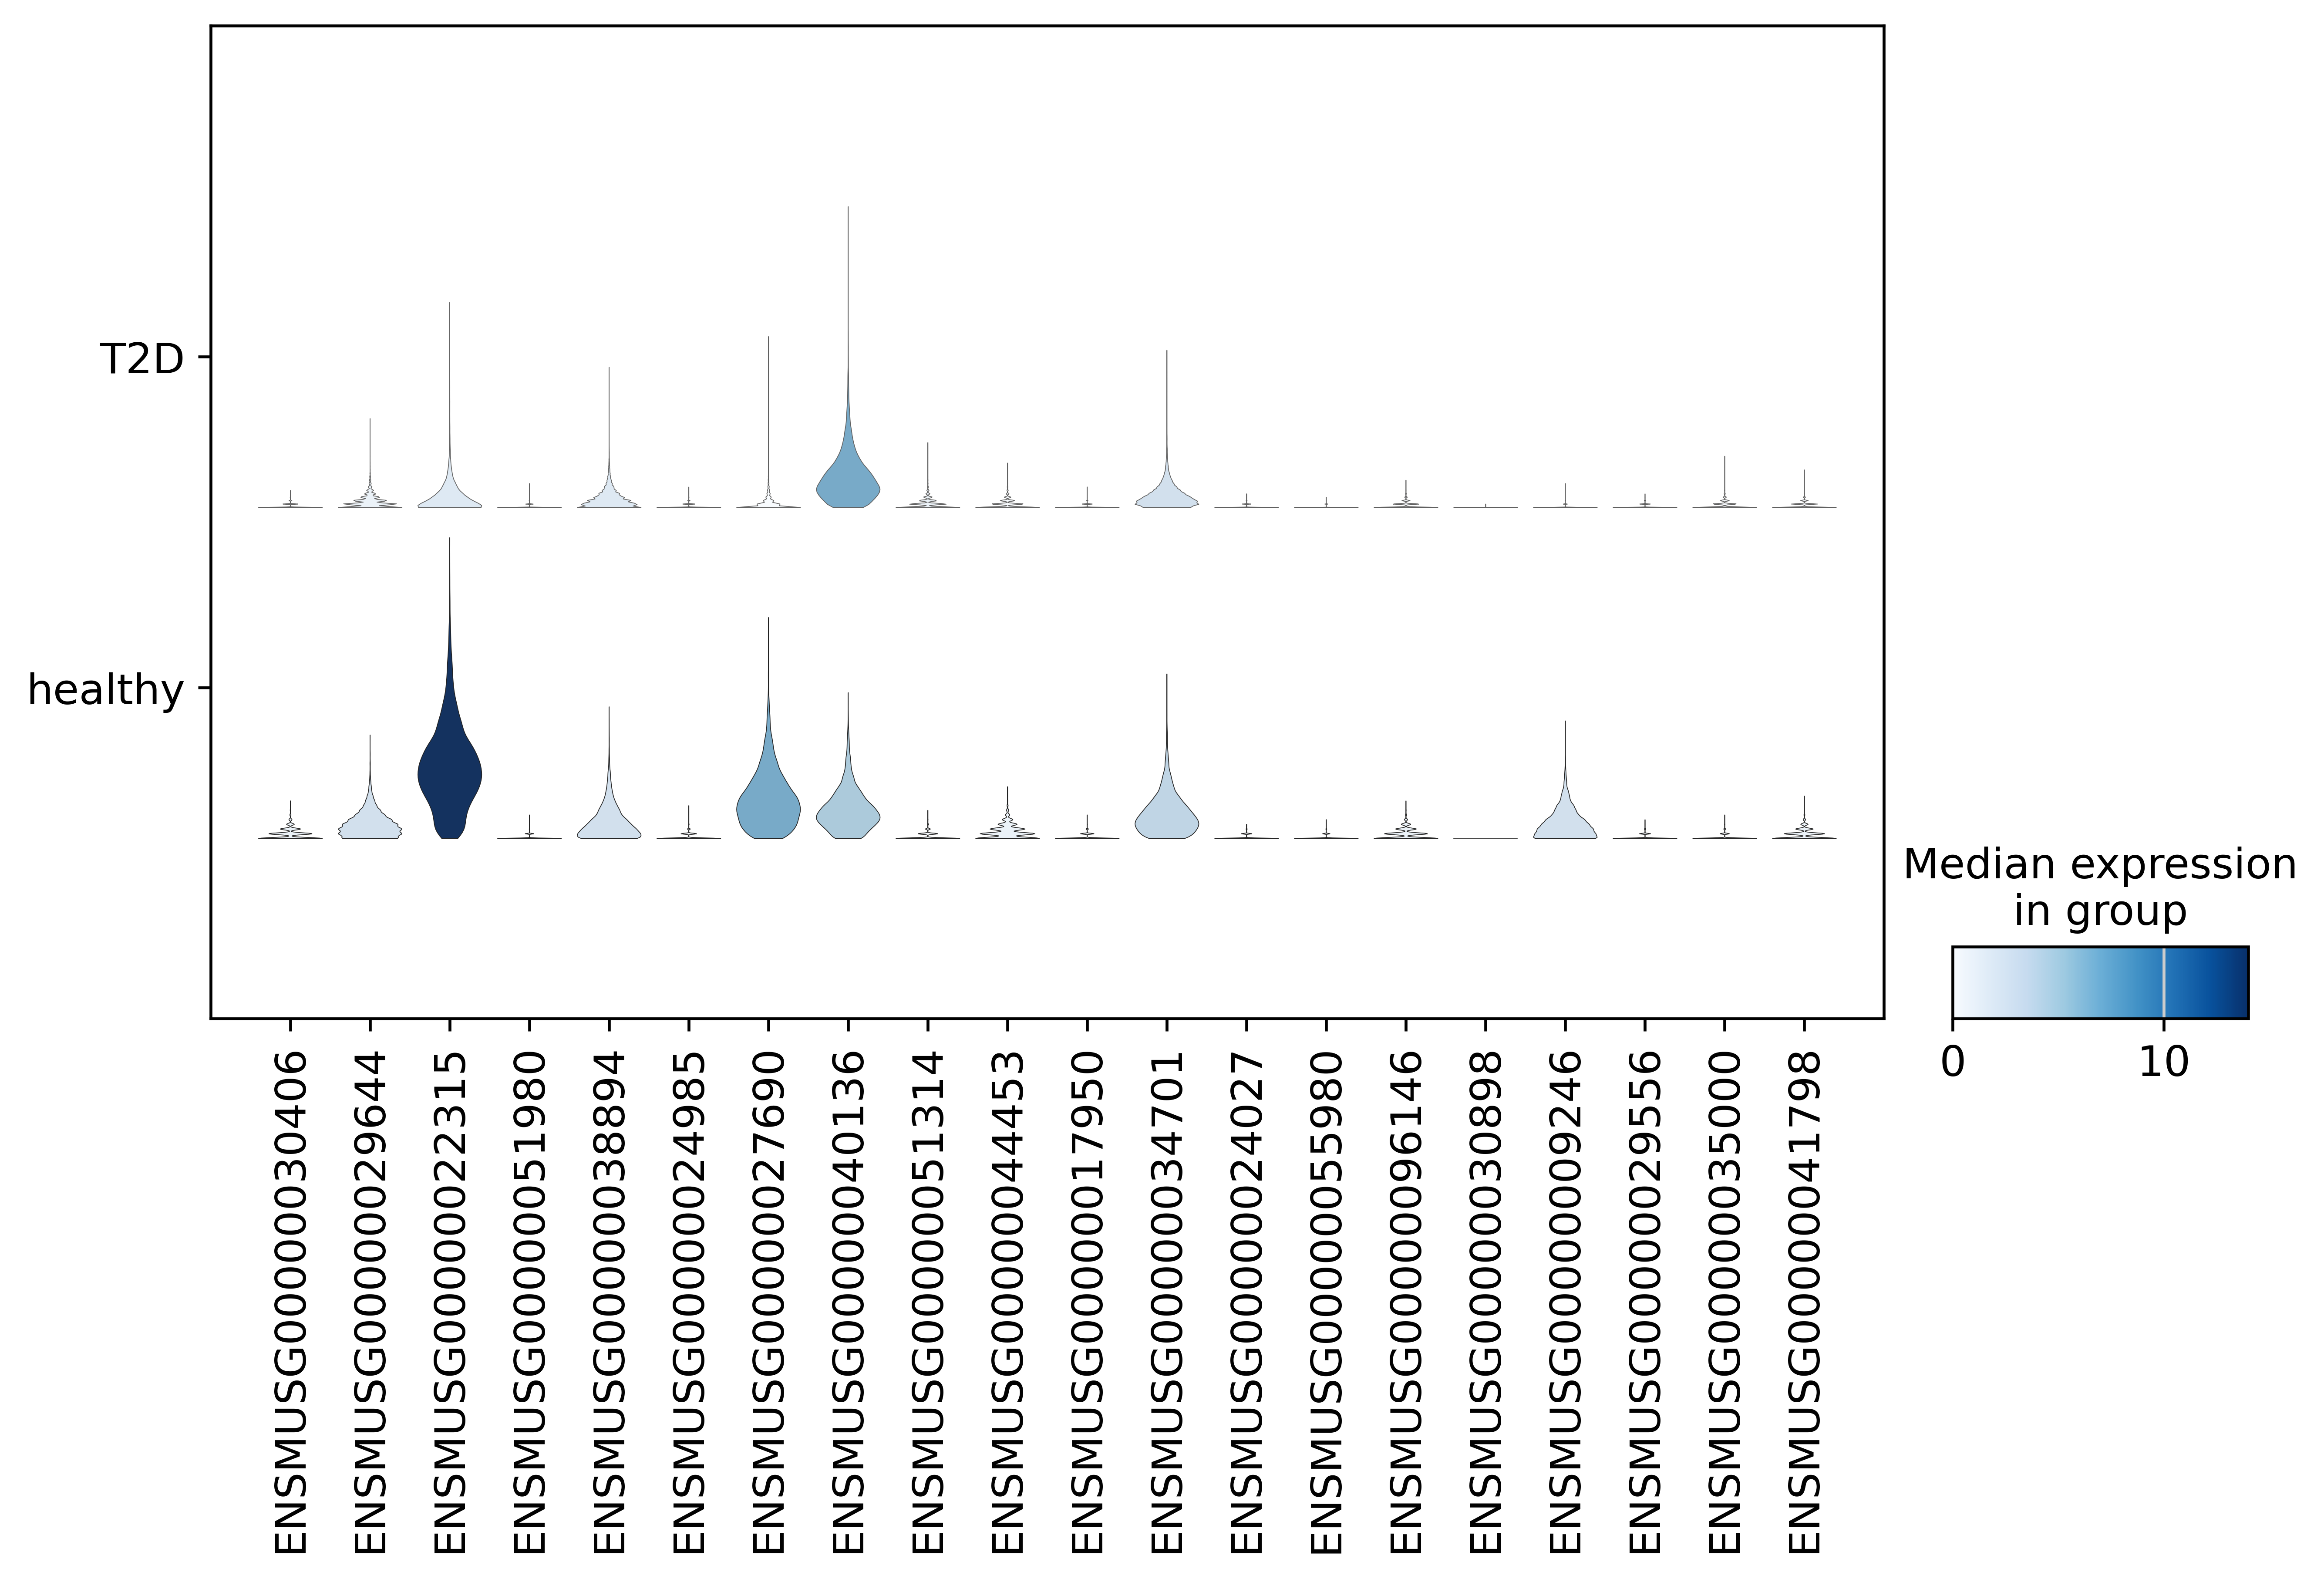

In [129]:
sc.pl.stacked_violin(dbdb_plot, df["Gene stable ID"], groupby='disease', dendrogram=False, figsize=[10, 5])

In [133]:
mSTZ_plot = mSTZ[mSTZ.obs.cell_type == "type B pancreatic cell"]

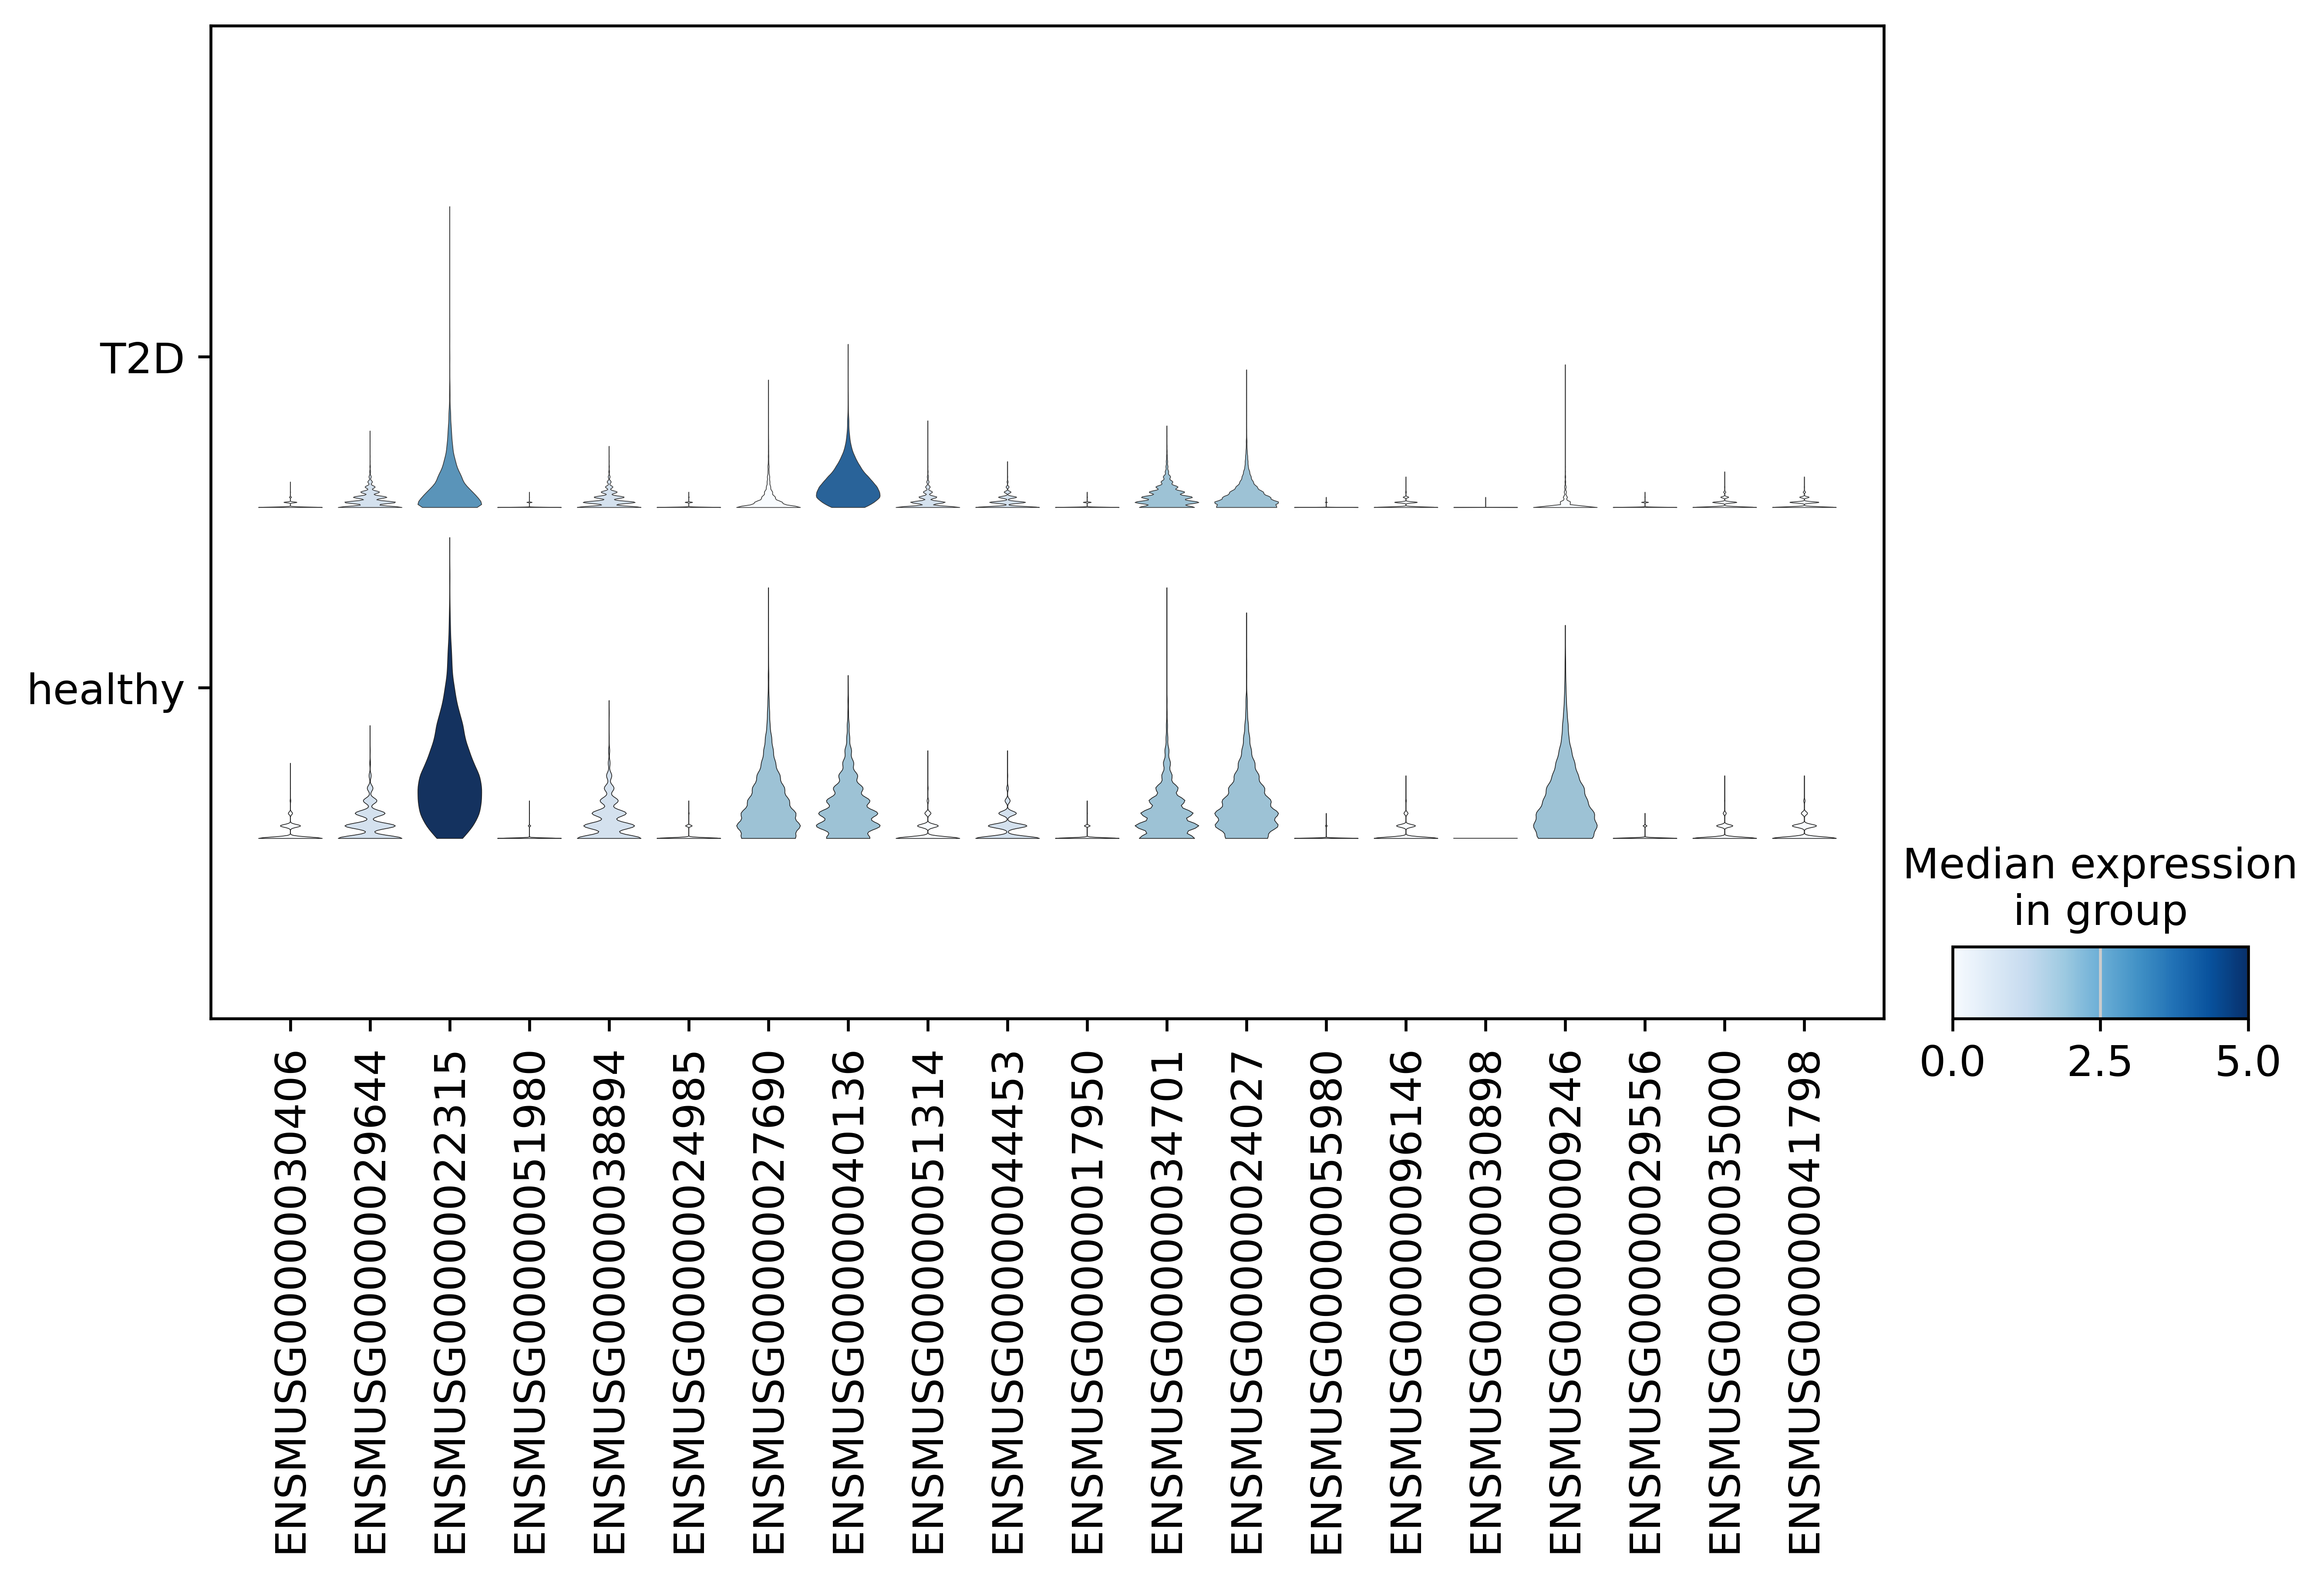

In [135]:
sc.pl.stacked_violin(mSTZ_plot, df["Gene stable ID"], groupby='disease', dendrogram=False, figsize=[10, 5])

In [18]:
interesting = ["ENSMUSG00000022315", "ENSMUSG00000027690", "ENSMUSG00000040136", "ENSMUSG00000009246", "ENSMUSG00000034701", "ENSMUSG00000030406", "ENSMUSG00000024027"]
genes_considered = pd.read_table("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/make_big_dataset/genes_shared_across_datasets.txt")

In [164]:
df[df["Gene stable ID"].isin(interesting)].to_csv("./interesting_genes_results/interesting_genes_table.csv")

In [137]:
dbdb_violin = dbdb[dbdb.obs.cell_type == "type B pancreatic cell", dbdb.var.index.isin(interesting)]
mSTZ_violin = mSTZ[mSTZ.obs.cell_type == "type B pancreatic cell", mSTZ.var.index.isin(interesting)]
dbdb_violin.obs.dataset = "db/db"

In [141]:
var_names = []
for gene_ID in dbdb_violin.var.index.tolist():
    name = df[df["Gene stable ID"] == gene_ID]["Gene name"].item()
    var_names.append(name)

In [142]:
dbdb_violin.var.index = var_names
mSTZ_violin.var.index = var_names

In [143]:
violin_adata = sc.concat([dbdb_violin, mSTZ_violin])

In [144]:
violin_adata.obs["Clusters"] = [dataset + " " + disease for dataset, disease in zip(violin_adata.obs.dataset, violin_adata.obs.disease)]

In [145]:
var_names

['Trpm5', 'Slc30a8', 'Glp1r', 'Slc2a2', 'Gipr', 'Neurod1', 'Abcc8']

In [146]:
violin_adata.var.index = var_names

In [147]:
violin_adata.var_names = violin_adata.var.index

In [148]:
dbdb_violin

AnnData object with n_obs × n_vars = 31983 × 7
    obs: 'disease', 'dataset', 'organism', 'cell_type'

In [150]:
violin_adata.var["Gene_names"] = var_names

In [151]:
violin_adata.var.columns

Index(['Gene_names'], dtype='object')

In [152]:
violin_adata.var

,Gene_names
Trpm5,Trpm5
Slc30a8,Slc30a8
Glp1r,Glp1r
Slc2a2,Slc2a2
Gipr,Gipr
Neurod1,Neurod1
Abcc8,Abcc8


In [155]:
violin_adata.var_keys

<bound method AnnData.var_keys of AnnData object with n_obs × n_vars = 46312 × 7
    obs: 'disease', 'dataset', 'organism', 'cell_type', 'Clusters'
    var: 'Gene_names'>

In [168]:
var_names

['Trpm5', 'Slc30a8', 'Glp1r', 'Slc2a2', 'Gipr', 'Neurod1', 'Abcc8']

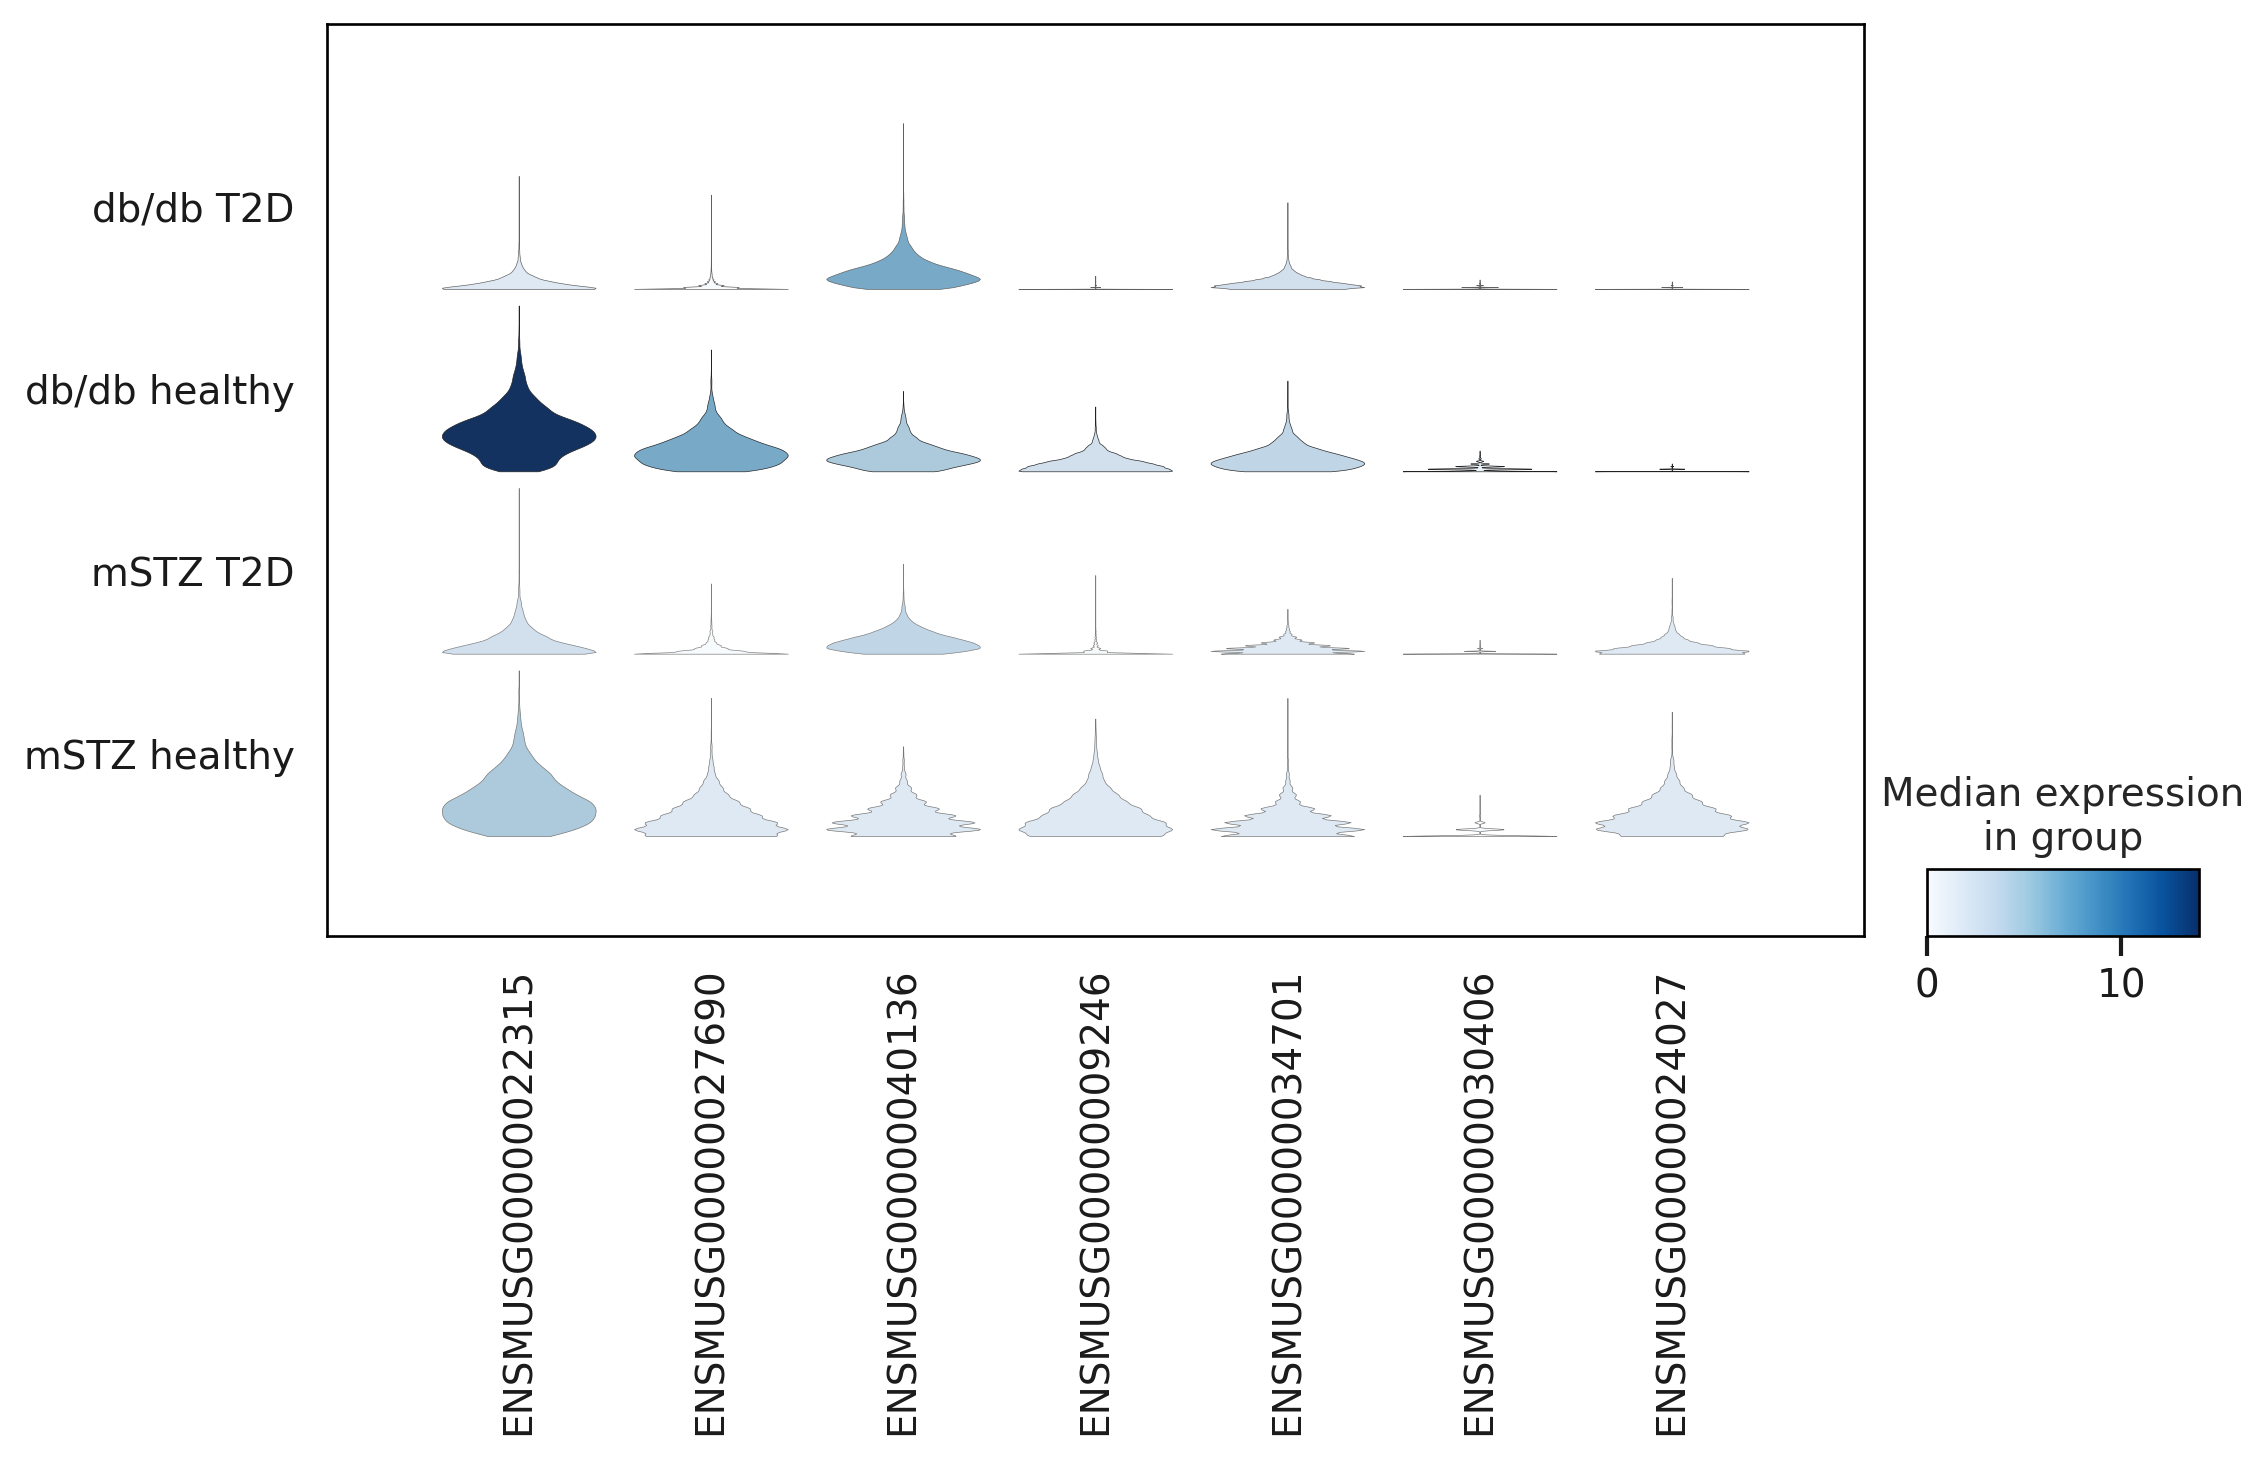

In [167]:
sc.set_figure_params(dpi = 120)
sc.pl.stacked_violin(violin_adata, var_names=interesting, groupby="Clusters", figsize=[10, 5], save="expression_comparison_for_interesing_genes.png")

### Gene expression of other experiment runs

Now I need to compare GT to my experiments

In [13]:
import os
from tqdm import tqdm
import pickle
import numpy as np
import pandas as pd
import gc
gc.enable()

In [3]:
configs_dbdb_df = pd.read_csv("/d/hpc/projects/FRI/DL/mo6643/MSC/cross_species_prediction/transVAE_seml/notebooks/presentation_notebooks/configs_dbdb_df.csv")
configs_mSTZ_df = pd.read_csv("/d/hpc/projects/FRI/DL/mo6643/MSC/cross_species_prediction/transVAE_seml/notebooks/presentation_notebooks/configs_mSTZ_df.csv")

#### dbdb

Because of memory issues I will do this in steps (each test dataset seperately)

In [7]:
top_preds_dbdb = {}
for index, row in tqdm(configs_dbdb_df.iterrows(), total = configs_dbdb_df.shape[0]):
    save_folder_name = "datasets_for_GSEA"  
    # Construct the directory path for the saved models
    save_dir = f"/d/hpc/projects/FRI/DL/mo6643/MSC/cross_species_prediction_save/{save_folder_name}"
    save_folder = f"transVAE_train_{row['config.addl_dataset_train']}_hid{row['config.n_hidden']}_lat{int(row['config.n_latent'])}_lr{row['config.learning_rate']}_cov{int(row['config.cov_embed_dims'])}_ep{int(row['config.max_epochs'])}_ly{row['config.n_layers']}_dr{row['config.dropout_rate']}_kl{row['config.kl_weight']}_wd{row['config.weight_decay']}_s{int(row['config.seed'])}"
    dir_path = os.path.join(save_dir, save_folder)
    
    addl_dataset = row["config.addl_dataset_train"].split(".")[0]
    
    # Load the prediction file if it exists
    pred_file = os.path.join(dir_path, "preds_dbdb_OOD.npy")
    if os.path.exists(pred_file):
        preds = np.load(pred_file)
        top_preds_dbdb[addl_dataset] = preds
    else:
        print(f"Prediction file not found for configuration: {save_folder}")
    

  0%|          | 0/21 [00:00<?, ?it/s]

Prediction file not found for configuration: transVAE_train_combination_hid1000_lat512_lr0.0001_cov10_ep1500_ly8_dr0.0001_kl0.005_wd0.3_s42


100%|██████████| 21/21 [00:43<00:00,  2.09s/it]


In [8]:
missing = "transVAE_train_combination_hid1000_lat512_lr0.0001_cov10_ep1500_ly8_dr0.0001_kl0.005_wd0.3_s42"
save_folder_name = "full_genes_big_data_w_and_wo_ct_encoding_10_reps"  
# Construct the directory path for the saved models
save_dir = f"/d/hpc/projects/FRI/DL/mo6643/MSC/cross_species_prediction_save/{save_folder_name}"
dir_path = os.path.join(save_dir, missing)
# Load the prediction file if it exists
pred_file = os.path.join(dir_path, "preds_dbdb_OOD.npy")
if os.path.exists(pred_file):
    preds = np.load(pred_file)
    top_preds_dbdb["combination"] = preds

In [27]:
dbdb = dbdb[:,dbdb.var.index.isin(interesting)]
mSTZ = mSTZ[:,mSTZ.var.index.isin(interesting)]

In [19]:
wang = sc.read_h5ad("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/data_to_predict/wang_to_predict_cleanCT.h5ad")
wang = wang[:,wang.var.index.isin(genes_considered.genes_shared_across_datasets.tolist())]

wang_OOD = wang[wang.obs.disease == "T2D"]

In [37]:
for dataset, array in top_preds_dbdb.items():
    adata = ad.AnnData(X=array, var = wang_OOD.var, obs = wang_OOD.obs)
    adata.obs["dataset"] = dataset
    adata = adata[:,adata.var.index.isin(interesting)]
    top_preds_dbdb[dataset] = adata

dbdb.obs["dataset"] = "ground truth"
adatas = list(top_preds_dbdb.values())
adatas.append(dbdb)

del top_preds_dbdb
gc.collect()

adata = sc.concat(adatas=adatas, axis=0)
adata = adata[adata.obs.disease == "T2D"]
adata = adata[adata.obs.cell_type == "type B pancreatic cell"]

In [41]:
data = adata.X.todense()

col_names = []
for gene in adata.var.index.tolist():
    name = df[df["Gene stable ID"] == gene]["Gene name"].item()
    col_names.append(name)

data = pd.DataFrame(data, columns=col_names)

data["dataset"] = adata.obs.dataset.tolist()

genes = data.columns.tolist()
genes.pop()
comparisions = data.dataset.unique().tolist()
comparisions.pop()

'ground truth'

I calculate the Wasserstain difference to see which distribution is the closests to the original.

In [42]:
from scipy.stats import wasserstein_distance

In [43]:
results = {}
for gene in tqdm(genes):
    expression = data[gene]
    u_values = expression[data.dataset == 'ground truth']
    distances = []
    for comparision in comparisions:
        v_values = expression[data.dataset == comparision]
        distances.append(wasserstein_distance(u_values, v_values))
    distances.append(0)
    results[gene] = distances

100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


In [44]:
wasserstain_distances = pd.DataFrame(results)

comparisions.append('ground truth')
wasserstain_distances["dataset"] = comparisions

/tmp/ipykernel_1177618/384807951.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_1177618/384807951.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_1177618/384807951.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_1177618/384807951.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_1177618/384807951.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_1177618/384807951.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xt

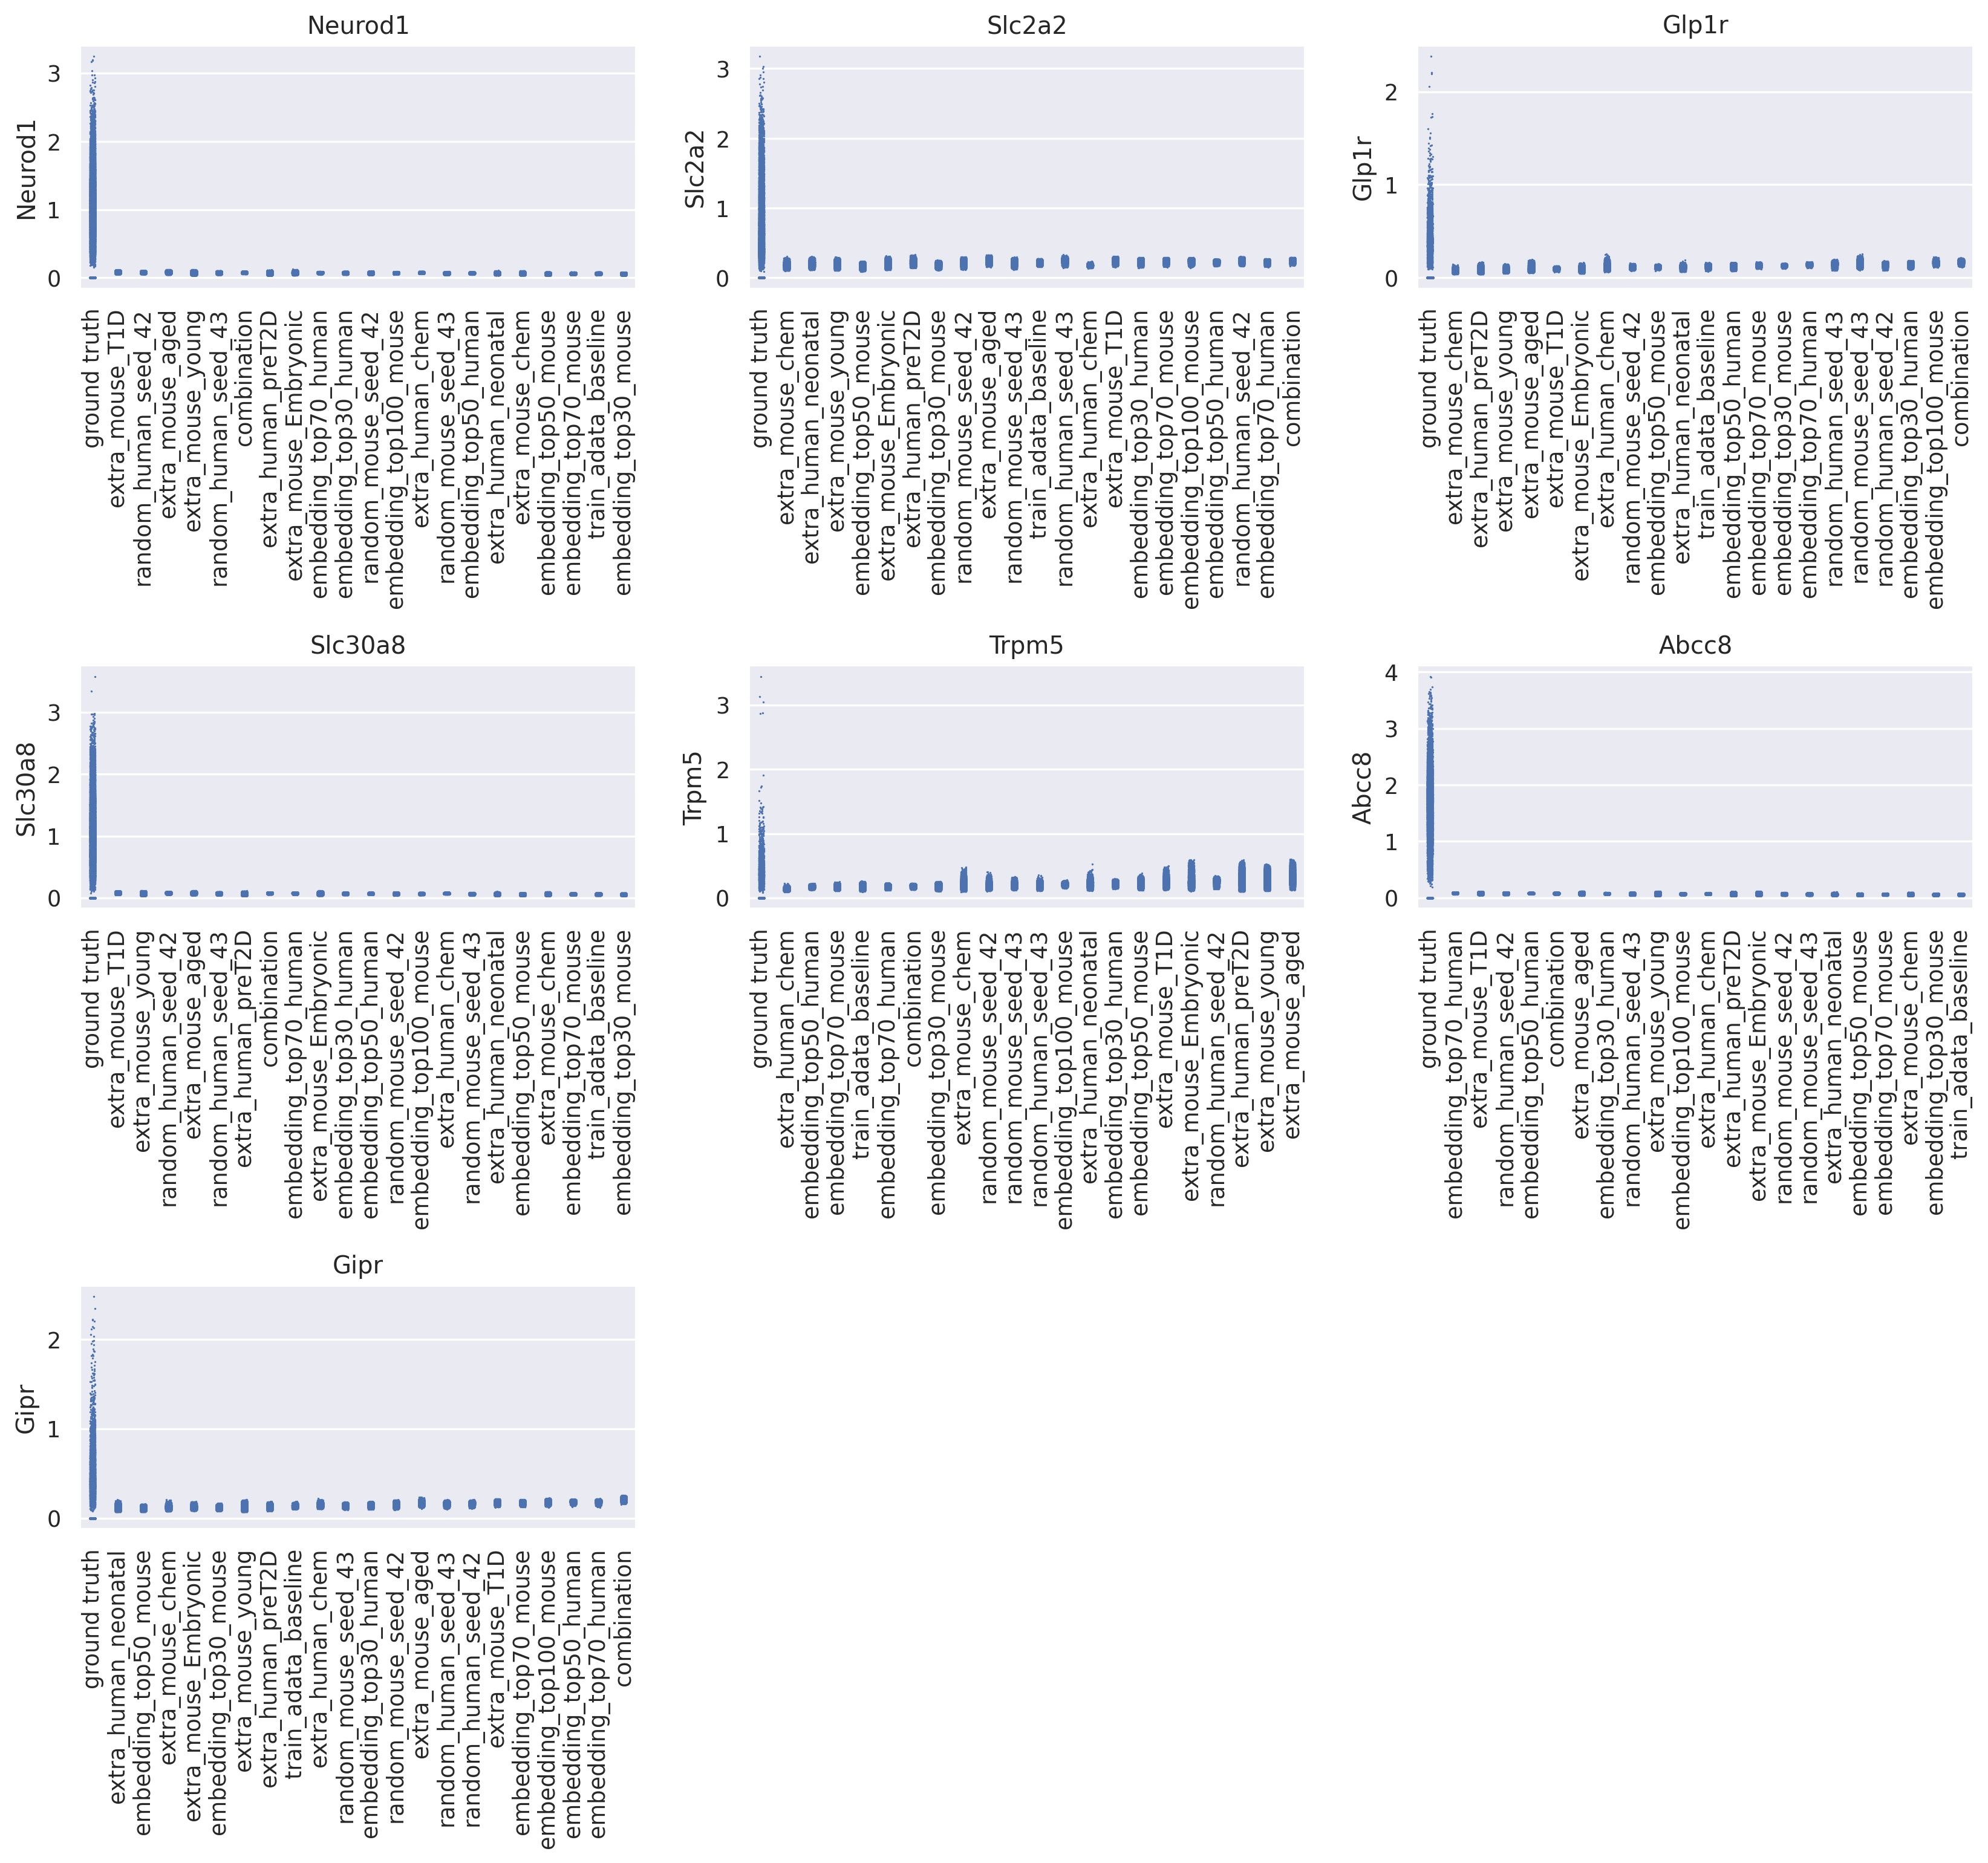

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set_theme(rc={'figure.figsize':(12, 24), "figure.dpi": 120})
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 13))

for i, col_name in enumerate(col_names):  # Iterate over the first 7 columns
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.stripplot(y=data[col_name], x=data['dataset'], ax=ax, order = wasserstain_distances.sort_values(col_name)["dataset"], size = 1)
    ax.set_title(col_name)
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
# Remove the last (8th) subplot
axes[-1, -1].set_visible(False)
axes[-1, -2].set_visible(False)

fig.tight_layout()
plt.savefig("./interesting_genes_results/dbdb_interesting_genes_stripplot_wasserstain_distance.png")
plt.show()


#### mSTZ
Performing the analysis for mSTZ

In [14]:
# getting preds data mSTZ

top_preds_mSTZ = {}
for index, row in tqdm(configs_mSTZ_df.iterrows(), total = configs_mSTZ_df.shape[0]):
    save_folder_name = "datasets_for_GSEA"  
    # Construct the directory path for the saved models
    save_dir = f"/d/hpc/projects/FRI/DL/mo6643/MSC/cross_species_prediction_save/{save_folder_name}"
    save_folder = f"transVAE_train_{row['config.addl_dataset_train']}_hid{row['config.n_hidden']}_lat{int(row['config.n_latent'])}_lr{row['config.learning_rate']}_cov{int(row['config.cov_embed_dims'])}_ep{int(row['config.max_epochs'])}_ly{row['config.n_layers']}_dr{row['config.dropout_rate']}_kl{row['config.kl_weight']}_wd{row['config.weight_decay']}_s{int(row['config.seed'])}"
    dir_path = os.path.join(save_dir, save_folder)
    
    addl_dataset = row["config.addl_dataset_train"].split(".")[0]
    
    # Load the prediction file if it exists
    pred_file = os.path.join(dir_path, "preds_dbdb_OOD.npy")
    if os.path.exists(pred_file):
        preds = np.load(pred_file)
        top_preds_mSTZ[addl_dataset] = preds
    else:
        missing = save_folder
        print(f"Prediction file not found for configuration: {save_folder}")
        
save_folder_name = "full_genes_big_data_w_and_wo_ct_encoding_10_reps"  
# Construct the directory path for the saved models
save_dir = f"/d/hpc/projects/FRI/DL/mo6643/MSC/cross_species_prediction_save/{save_folder_name}"
dir_path = os.path.join(save_dir, missing)
# Load the prediction file if it exists
pred_file = os.path.join(dir_path, "preds_dbdb_OOD.npy")
if os.path.exists(pred_file):
    preds = np.load(pred_file)
    top_preds_mSTZ["combination"] = preds
    

  0%|          | 0/21 [00:00<?, ?it/s]

Prediction file not found for configuration: transVAE_train_combination_hid1000_lat512_lr0.0001_cov10_ep1500_ly8_dr0.0001_kl0.005_wd0.3_s43


100%|██████████| 21/21 [00:46<00:00,  2.20s/it]


In [20]:
for dataset, array in top_preds_mSTZ.items():
    adata = ad.AnnData(X=array, var = wang_OOD.var, obs = wang_OOD.obs)
    adata.obs["dataset"] = dataset
    adata = adata[:,adata.var.index.isin(interesting)]
    top_preds_mSTZ[dataset] = adata

mSTZ.obs["dataset"] = "ground truth"
adatas = list(top_preds_mSTZ.values())
adatas.append(mSTZ)

In [21]:
del top_preds_mSTZ
gc.collect()

22

In [22]:
adata = sc.concat(adatas=adatas, axis=0)

/d/hpc/home/mo6643/miniconda3/envs/msc1/lib/python3.10/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/d/hpc/home/mo6643/miniconda3/envs/msc1/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [23]:
adata = adata[adata.obs.disease == "T2D"]

In [24]:
adata = adata[adata.obs.cell_type == "type B pancreatic cell"]

In [51]:
data = adata.X.todense()

In [53]:
col_names = []
for gene in adata.var.index.tolist():
    name = df[df["Gene stable ID"] == gene]["Gene name"].item()
    col_names.append(name)

In [54]:
data = pd.DataFrame(data, columns=col_names)

In [55]:
data["dataset"] = adata.obs.dataset.tolist()

In [56]:
genes = data.columns.tolist()
genes.pop()
comparisions = data.dataset.unique().tolist()
comparisions.pop()

'ground truth'

I calculate the Wasserstain difference to see which distribution is the closests to the original.

In [57]:
from scipy.stats import wasserstein_distance

In [58]:
results = {}
for gene in tqdm(genes):
    expression = data[gene]
    u_values = expression[data.dataset == 'ground truth']
    distances = []
    for comparision in comparisions:
        v_values = expression[data.dataset == comparision]
        distances.append(wasserstein_distance(u_values, v_values))
    distances.append(0)
    results[gene] = distances

100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


In [60]:
wasserstain_distances = pd.DataFrame(results)

In [61]:
comparisions.append('ground truth')
wasserstain_distances["dataset"] = comparisions

In [62]:
data

,Neurod1,Slc2a2,Glp1r,Slc30a8,Trpm5,Abcc8,Gipr,dataset
0,0.077195,0.250157,0.149108,0.074830,0.240108,0.075960,0.187382,embedding_top100_mouse
1,0.073730,0.233565,0.138366,0.071453,0.248720,0.072763,0.176094,embedding_top100_mouse
2,0.070643,0.235774,0.144913,0.068471,0.214975,0.069709,0.178523,embedding_top100_mouse
3,0.072704,0.248020,0.158845,0.070370,0.215834,0.071735,0.185357,embedding_top100_mouse
4,0.073478,0.239395,0.138715,0.071288,0.233934,0.072423,0.184645,embedding_top100_mouse
...,...,...,...,...,...,...,...,...
270483,1.052794,0.000000,1.334598,1.554198,0.000000,1.334598,0.000000,ground truth
270484,0.447132,0.000000,0.755013,0.000000,0.000000,1.477715,0.755013,ground truth
270485,0.990809,0.755625,0.755625,0.447548,0.000000,1.599650,0.000000,ground truth
270486,0.000000,0.629047,1.012199,1.682523,0.000000,1.964417,0.000000,ground truth


/tmp/ipykernel_1190630/1446473678.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_1190630/1446473678.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_1190630/1446473678.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_1190630/1446473678.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_1190630/1446473678.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_1190630/1446473678.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.

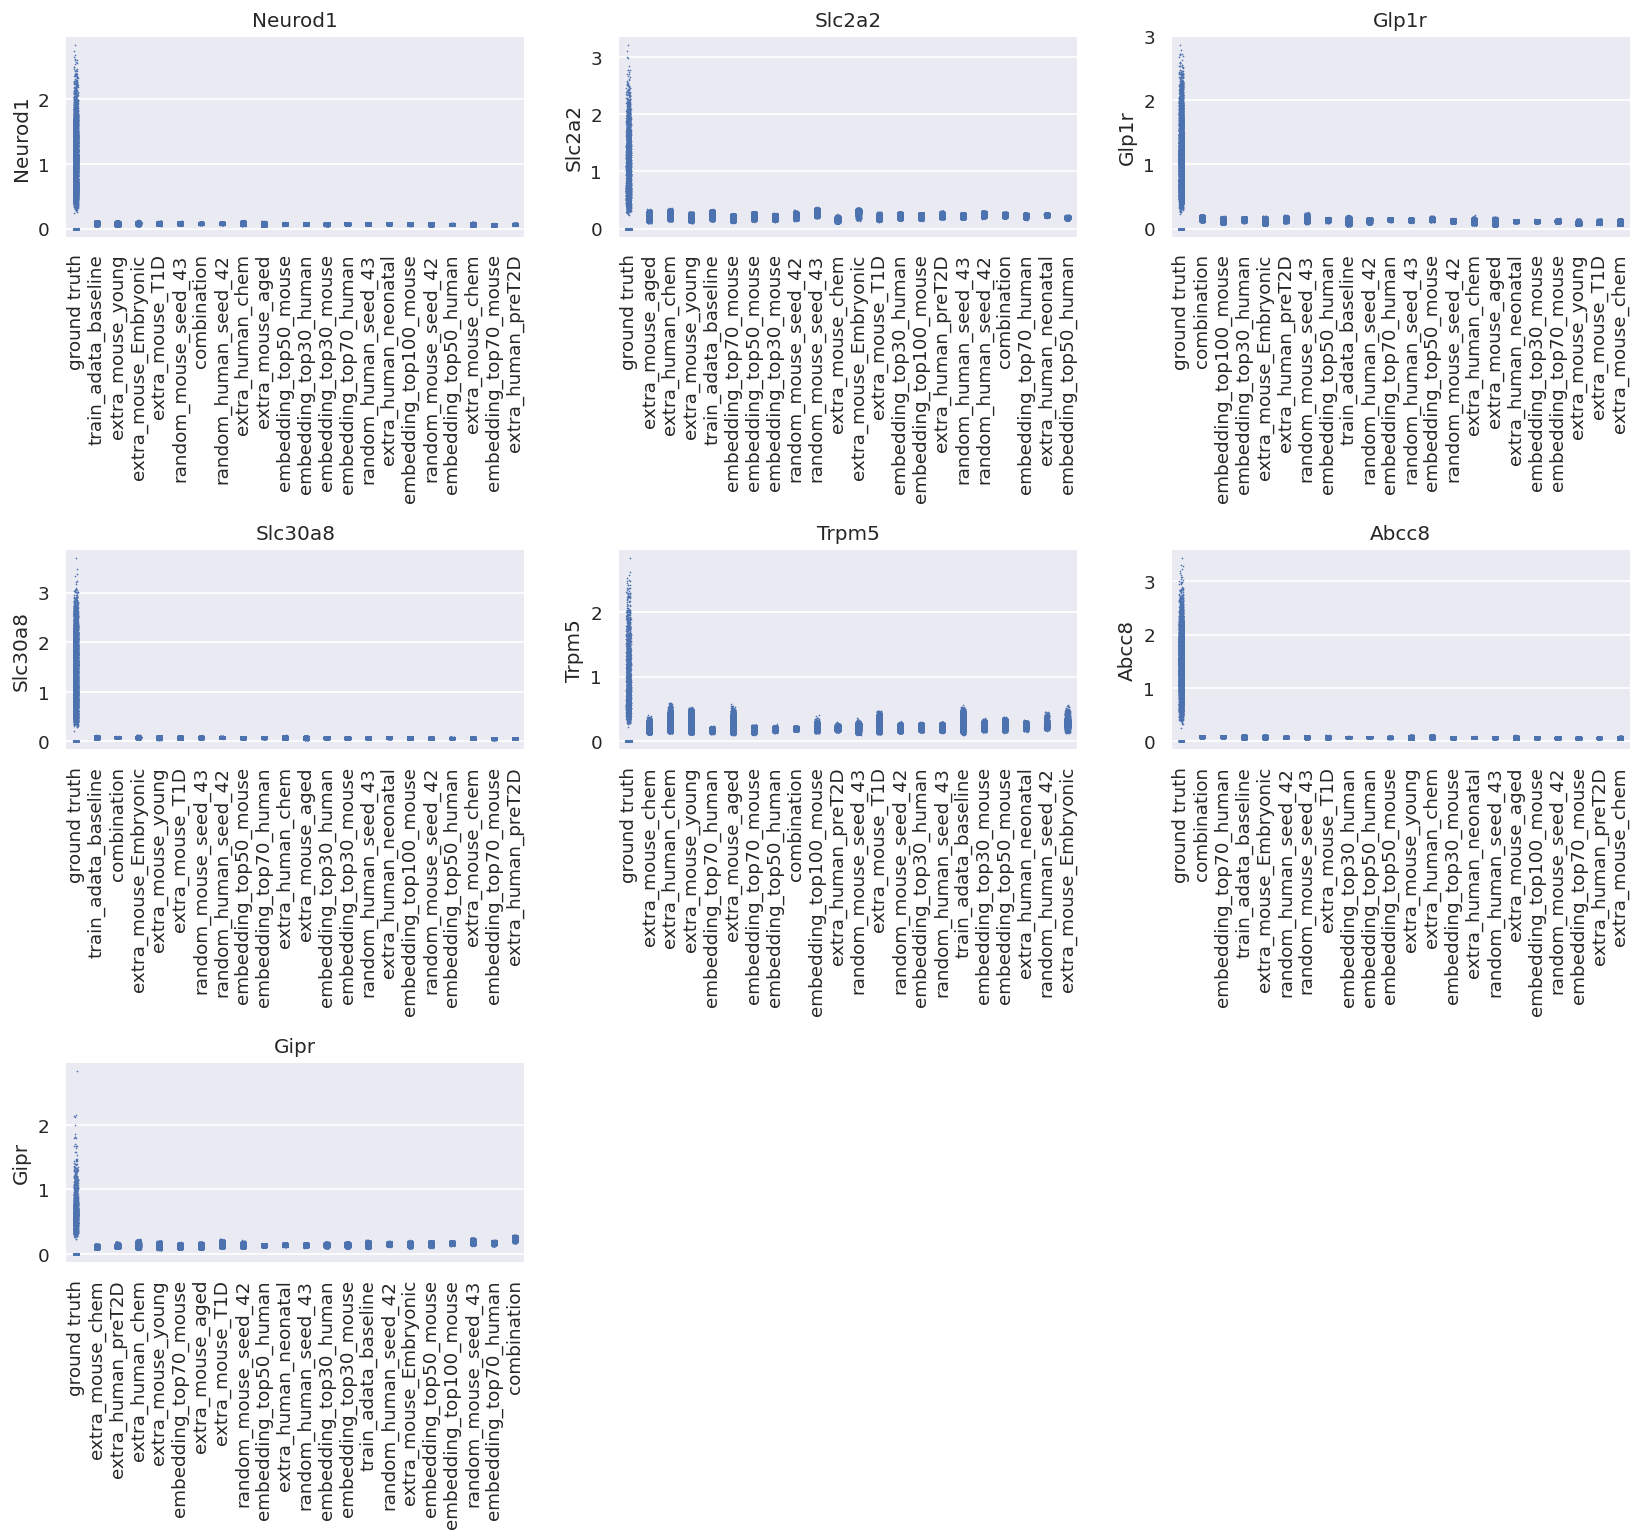

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set_theme(rc={'figure.figsize':(12, 24), "figure.dpi": 120})
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 13))

for i, col_name in enumerate(col_names):  # Iterate over the first 7 columns
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.stripplot(y=data[col_name], x=data['dataset'], ax=ax, order = wasserstain_distances.sort_values(col_name)["dataset"], size = 1)
    ax.set_title(col_name)
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
# Remove the last (8th) subplot
axes[-1, -1].set_visible(False)
axes[-1, -2].set_visible(False)

fig.tight_layout()
plt.savefig("./interesting_genes_results/mSTZ_interesting_genes_stripplot_wasserstain_distance.png")
plt.show()
